In [4]:
source("bm_simulations.R")

### Arithmetic Brownian Motion (with drift and absorbing barrier)

#### nsim: number of BM sample paths to be simulated
#### t: final time point 
#### n: number of time intervals/increments from 0:t
#### X0: first value of BM at time 0
#### mu: drift
#### sigma: diffusion coefficient
#### L: barrier

### Geometric Brownian Motion (with absorbing barrier)

#### same variables as ABM

#### can also use version from yuima package

### Running Simulations in Parallel

In [18]:
run_parallel <- function(args, function_choice) {              

    if(function_choice == "abm") {
        f <- function(i){ # specify the desired function and parameter values here
            my_abm(nsim = args$nsim, t = args$t, n = args$n, X0 = args$xo, mu = args$mu, sigma = args$sigma, L = args$L) # keep nsim = 1 for now, will change later
        }
    } else {
        f <- function(i){ # specify the desired function and parameter values here
            my_gbm(nsim = args$nsim, t = args$t, n = args$n, X0 = args$xo, mu = args$mu, sigma = args$sigma, L = args$L) # keep nsim = 1 for now, will change later
        }
    }
    
set.seed(1)
res <- mclapply(X = 1:1000, f, mc.cores = 8, mc.set.seed = TRUE) # X is the n of sim as a vector 
                                                                  # f is the function defined above 
                                                                  # mc.cores is the number of cores you want to use 

s <- values(x = res, nsim = 1000, n = 1000) # indexing the BM values 
mval <- s[[1]] # BM values in a matrix (goes into the plotting function)
dfval <- s[[2]] # BM values in a data frame

h <- hittings(x = res, nsim = 1000, n = 1000) # indexing the hitting times 
mhit <- h[[1]] # in a matrix (for histograms)
dfhit <- h[[2]] # in a data frame 

p <- bmplot(x = mval, nsim = 1000, t = 1, n = 1000, L = 0.95, ylim = c(min(mval), max(mval)), # Define the range of the y-axis  
             title = "Brownian motion with an absorbing barrier")
print(p)

hist(mhit, xlab = "Hitting time") # Histogram of hitting times 
    
}

In [25]:
params = list(
    nsim = 1,
    t = 1,
    n = 1000,
    xo = 1,
    mu = -1,
    sigma = 1,
    L = 0.95
)

#run_parallel(params, "abm")

### Results

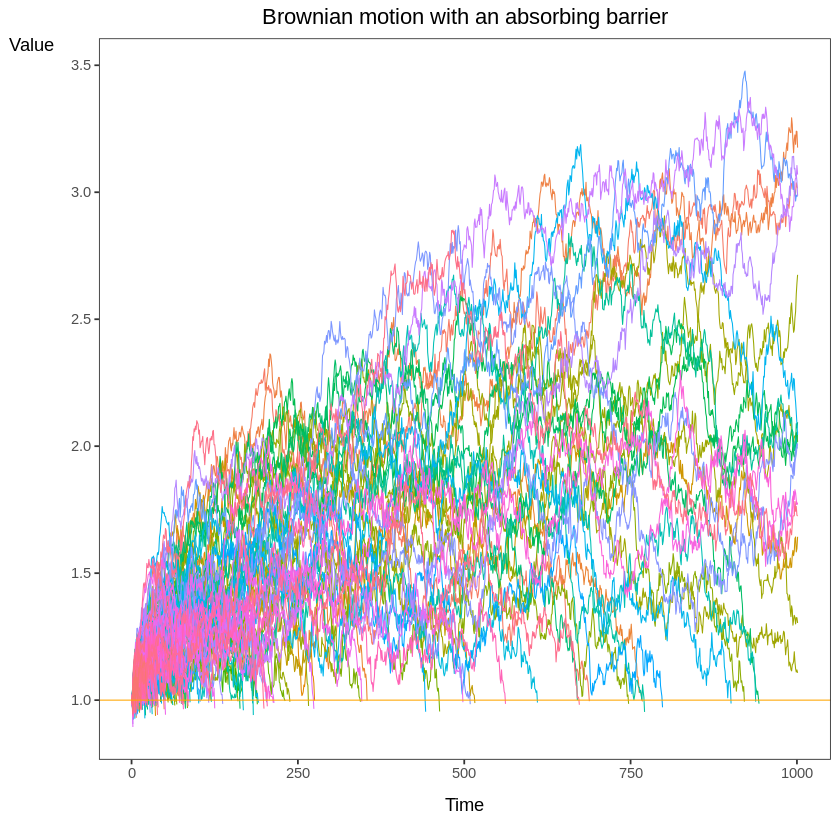

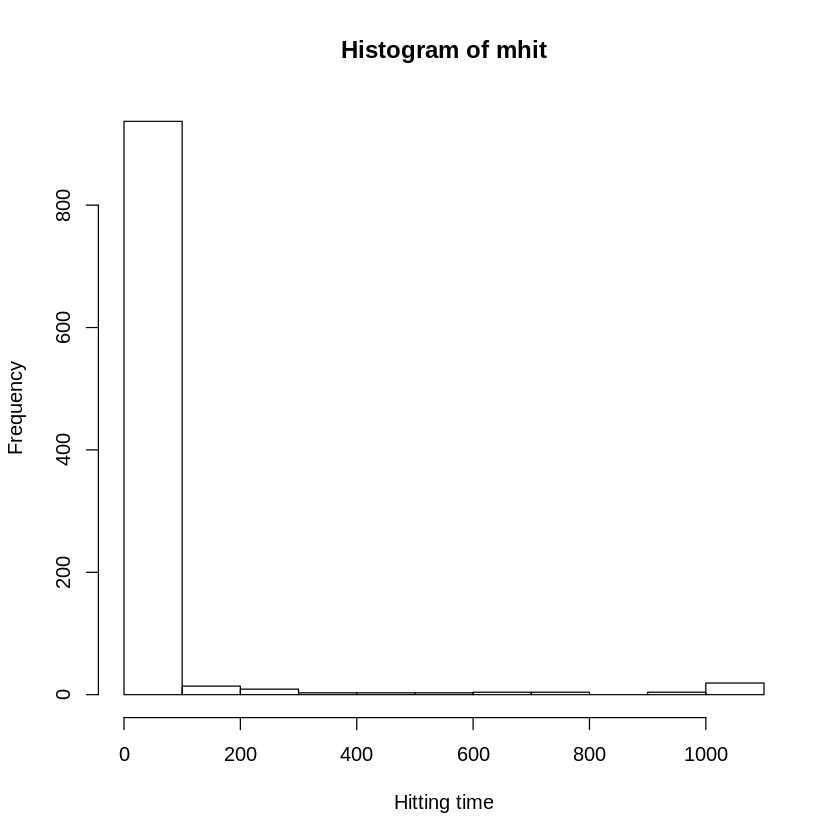

In [14]:
set.seed(1)
run_parallel(params, "abm") # 1000 sample paths, 1000 time intervals, mu = 0 (no drift), sigma = 1, L = 0.9999

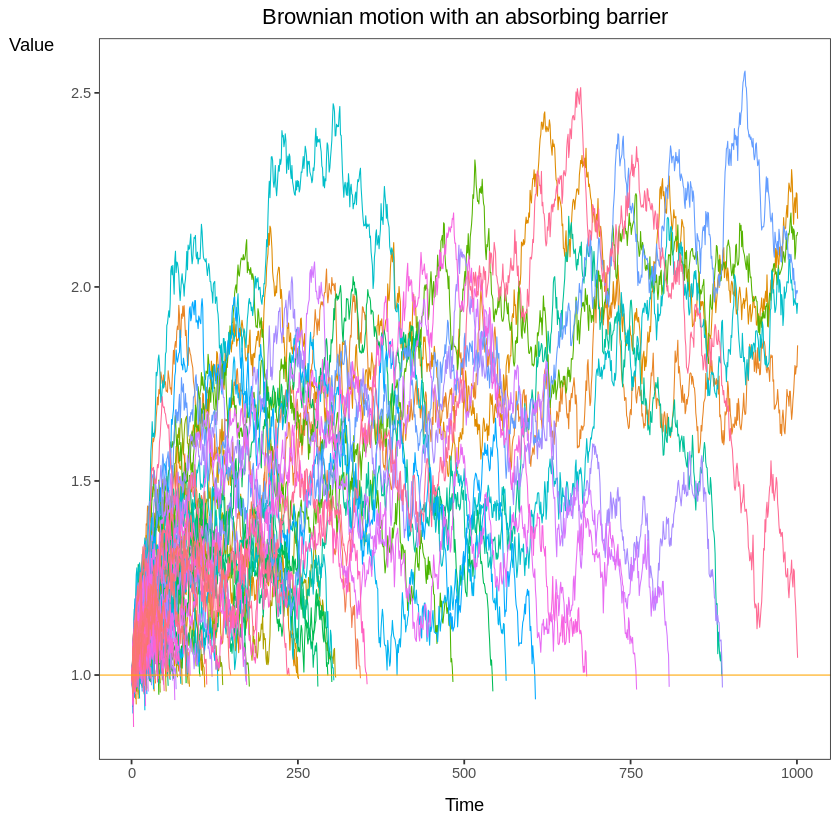

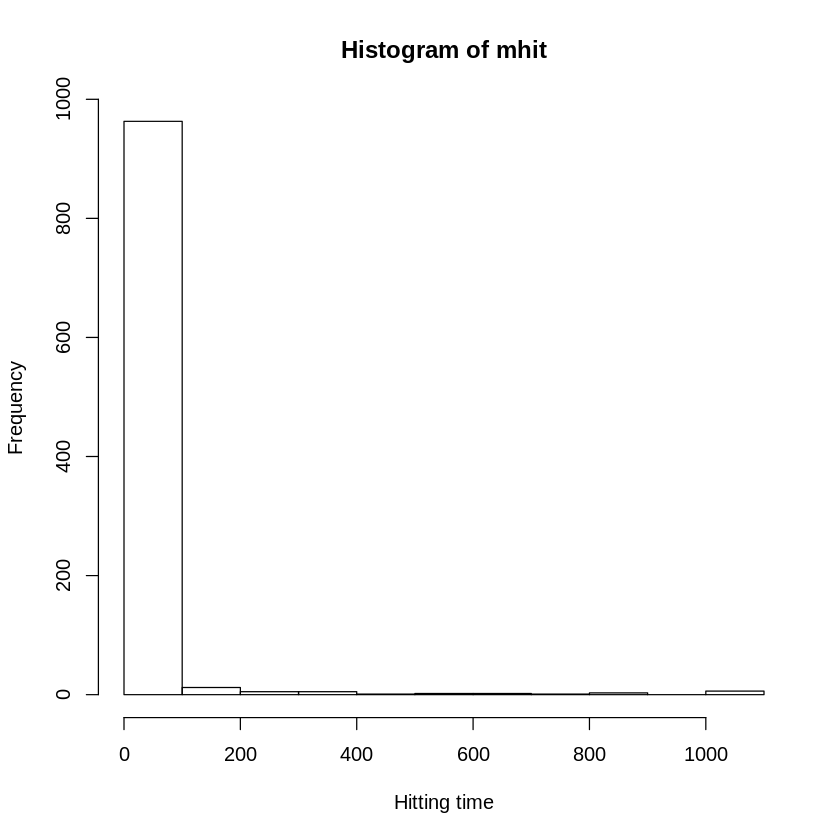

In [16]:
set.seed(1)
run_parallel(params, "abm") # 1000 sample paths, 1000 time intervals, mu = -1, sigma = 1, L = 0.9999

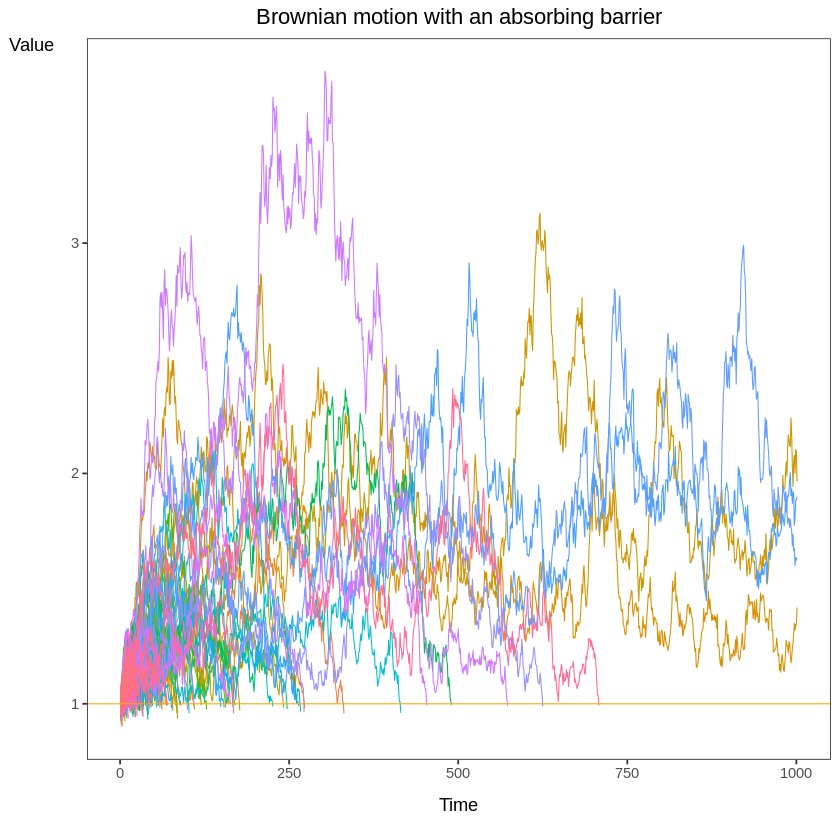

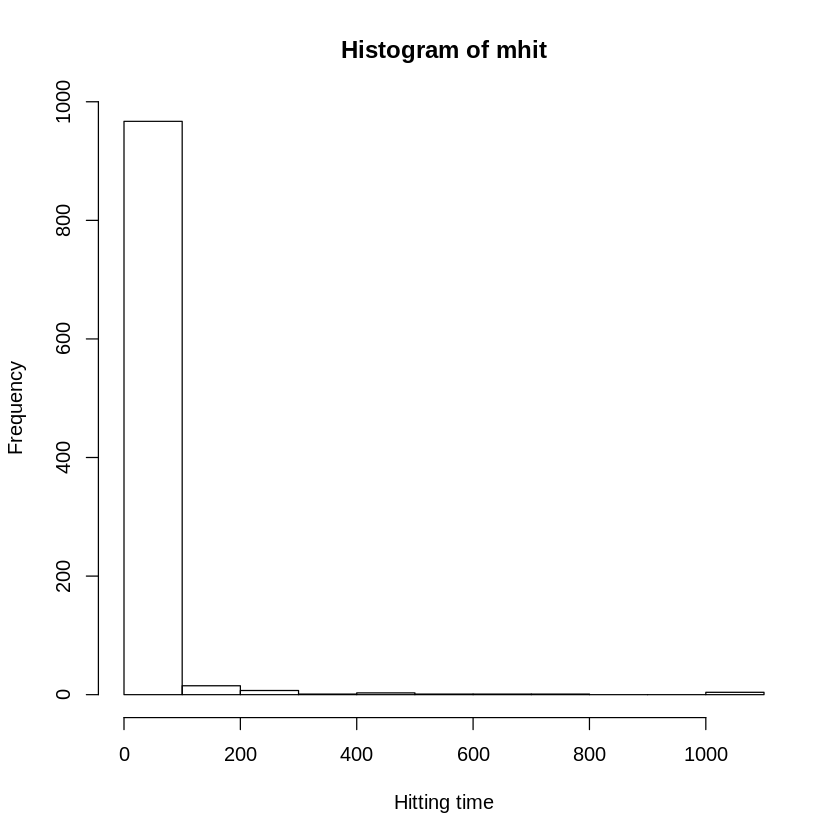

In [17]:
set.seed(1)
run_parallel(params, "gbm") # 1000 sample paths, 1000 time intervals, mu = -1, sigma = 1, L = 0.9999

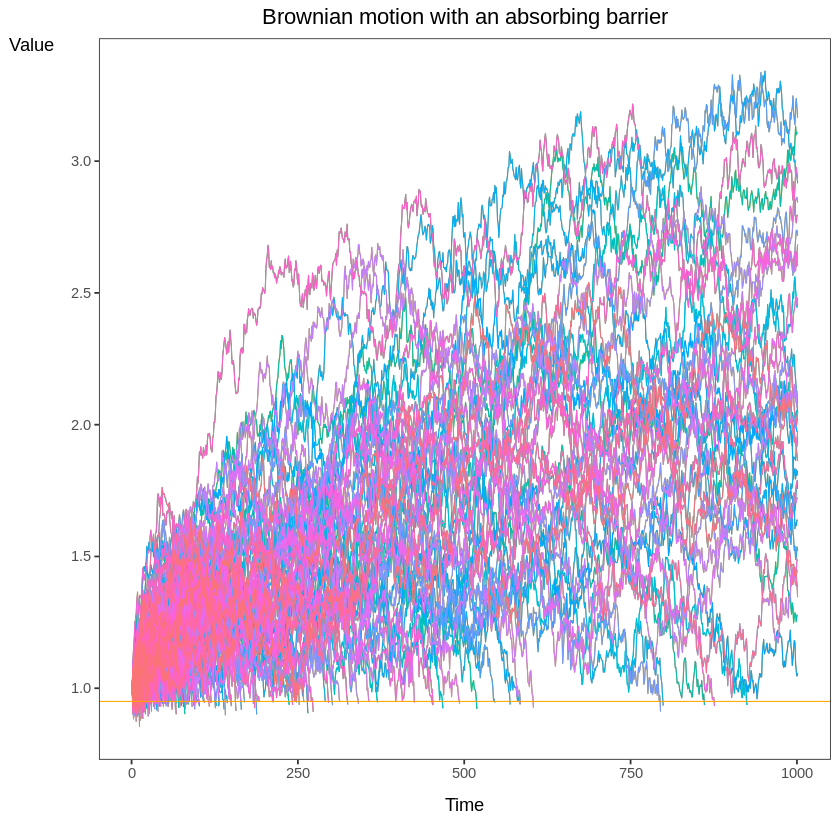

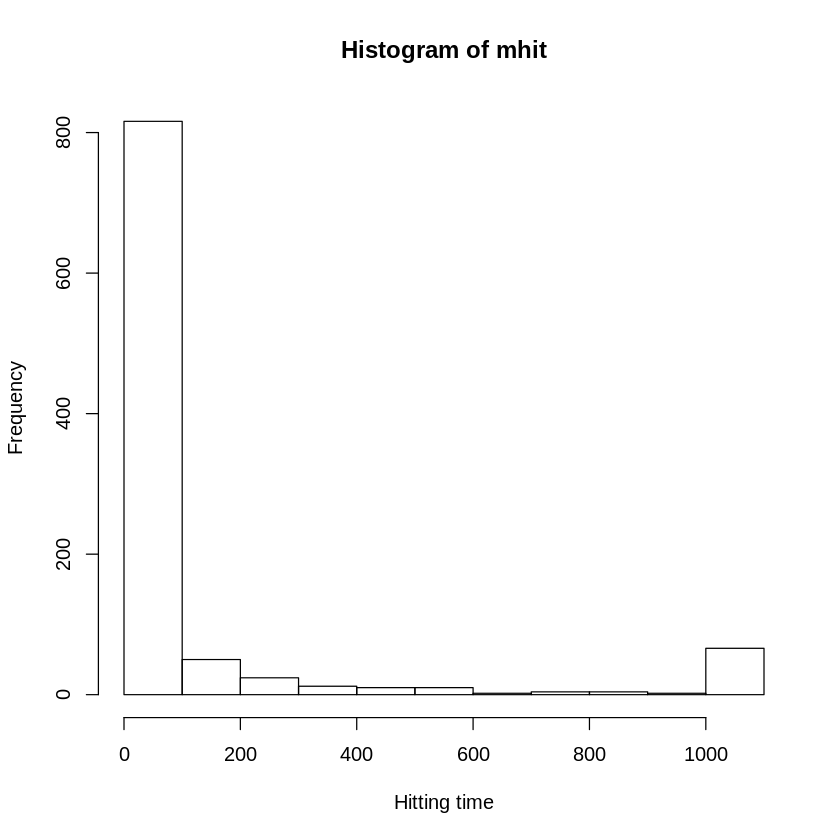

In [24]:
set.seed(1)
run_parallel(params, "abm") # 1000 sample paths, 1000 time intervals, mu = 0 (no drift), sigma = 1, L = 0.95

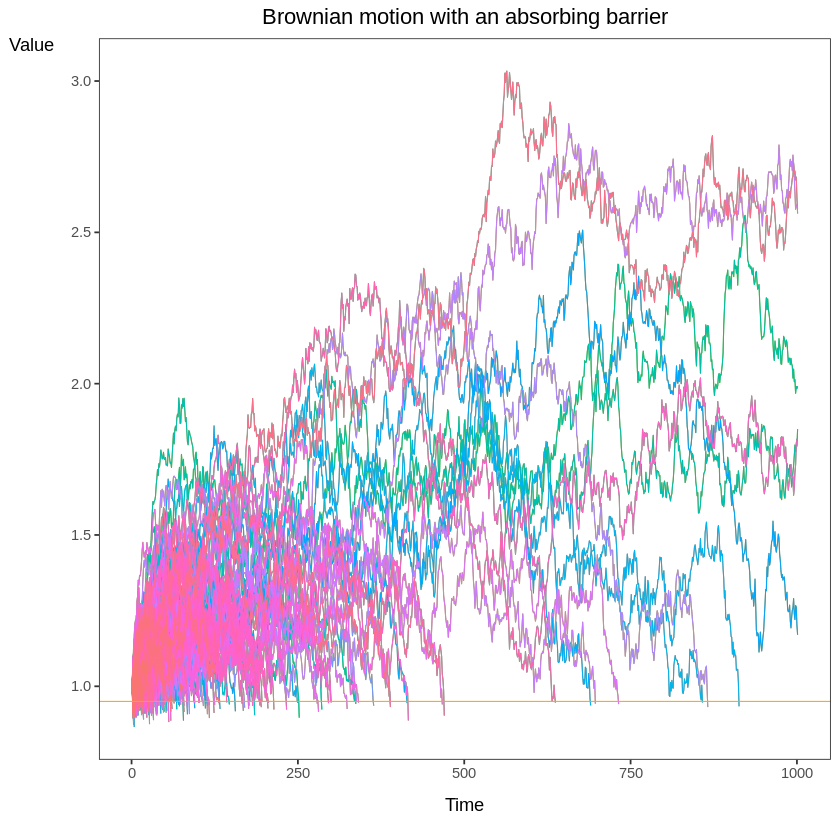

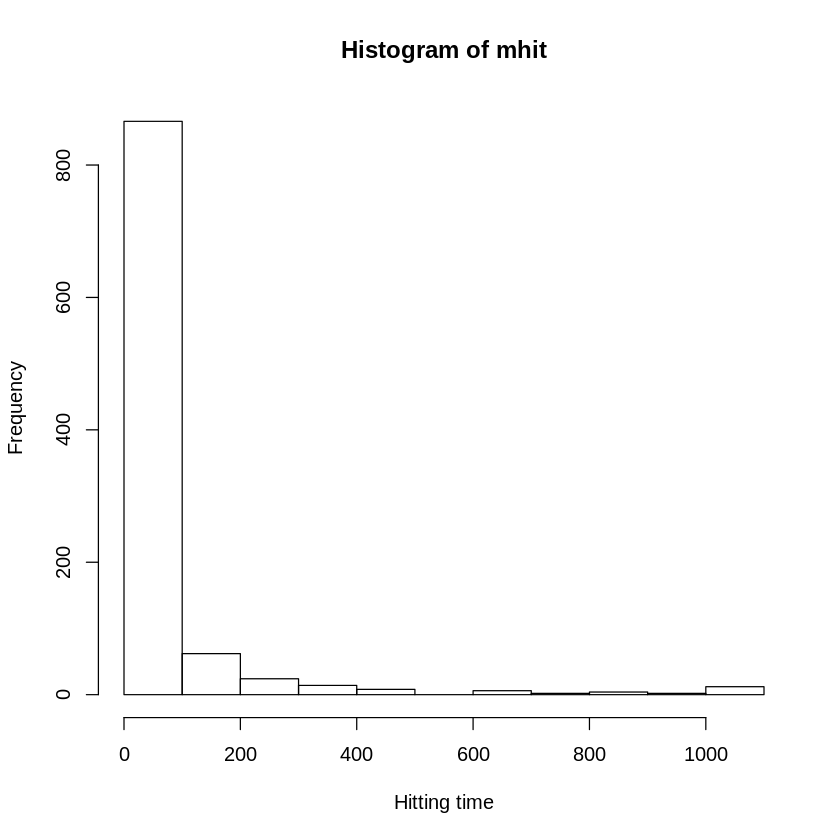

In [26]:
set.seed(1)
run_parallel(params, "abm") # 1000 sample paths, 1000 time intervals, mu = -1, sigma = 1, L = 0.95

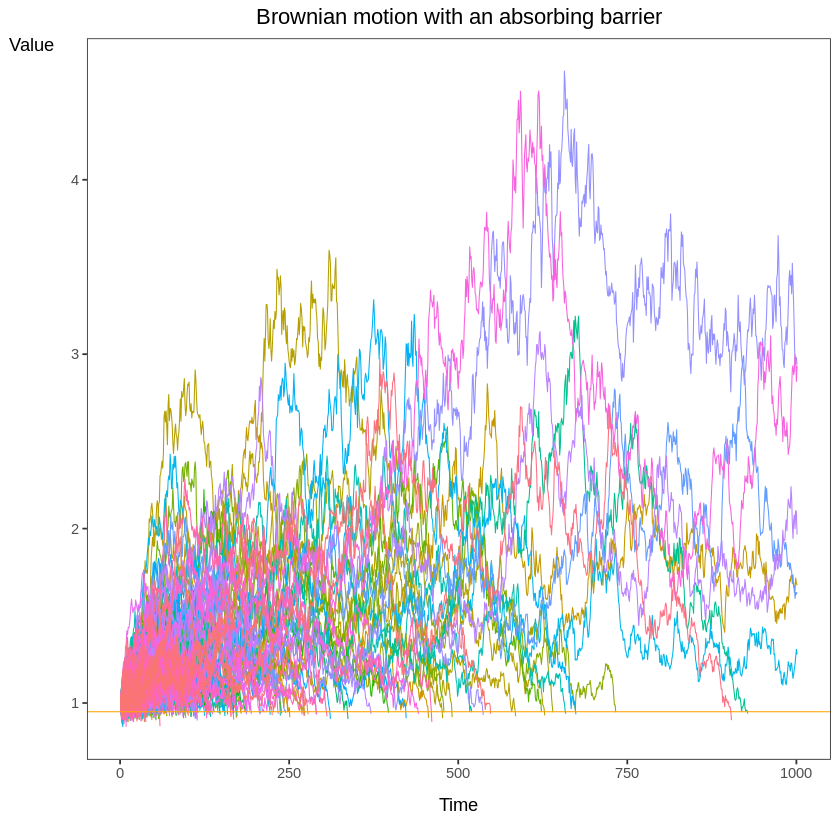

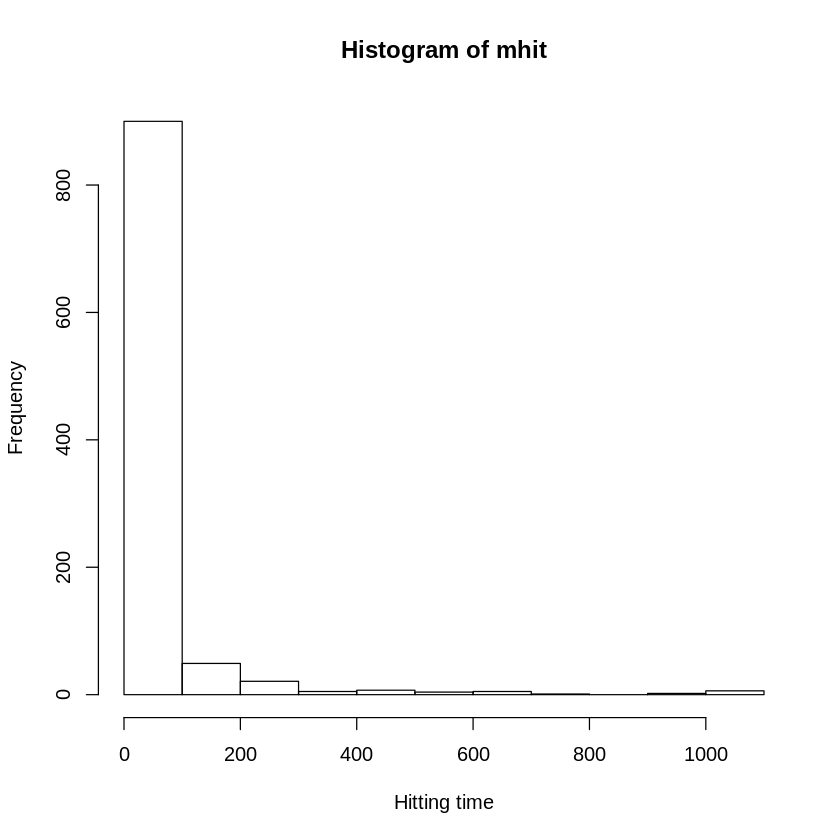

In [27]:
set.seed(1)
run_parallel(params, "gbm") # 1000 sample paths, 1000 time intervals, mu = -1, sigma = 1, L = 0.95